In [784]:
import numpy as np
import seaborn as sns
import os

from kaggle_environments import evaluate

Получим список агентов из папки agents:

In [745]:
agents = list(filter(lambda name: name.endswith('.py'), os.listdir('agents')))
display(agents)

['rock_draw_paper.py',
 'circle_pairs.py',
 'plus_one.py',
 'repeat_win_else_plus.py',
 'win_minus_else_repeat.py',
 'circle_counterclockwise.py',
 'random_wo_paper.py',
 'minus_one.py',
 'win_random_else_repeat.py',
 'random_value.py',
 'win_plus_else_repeat.py',
 'circle_clockwise.py']

В функции сравнения пропишем num_episodes=10, так как в некоторых случаях успешность всего эпизода зависит от первых случайных значений

In [767]:
def compare(agent1, agent2):
    """Сравниваем двух агентов"""
    result = evaluate("rps", [f'agents/{agent1}', f'agents/{agent2}'], configuration={"episodeSteps": 200}, num_episodes=10)
    return sum([x[0] for x in result])

Создадим матрицу и заполним её попарными сравнениями стратегий

In [776]:
matrix = np.zeros((len(agents), len(agents)))
for i in range(len(agents)):
    for j in range(i + 1, len(agents)):
        compa = compare(agents[i], agents[j])
        matrix[i][j] = compare(agents[i], agents[j])
        matrix[j][i] = -matrix[i][j]
display(matrix)

array([[    0.,   330., -1960.,  -597.,  1684.,  -651.,   619.,  1386.,
         1474.,     0.,  1878.,  -653.],
       [ -330.,     0.,  -991.,  -983.,     0.,     0.,     0.,     0.,
           41.,     0.,     0.,     0.],
       [ 1960.,   991.,     0.,     0.,  1980.,     0.,   467.,   199.,
         1978.,     0.,  1976.,     0.],
       [  597.,   983.,    -0.,     0.,   395., -1393.,   149.,  -794.,
         1977.,    24.,   396.,  -796.],
       [-1684.,    -0., -1980.,  -395.,     0.,  1973.,  -951.,     0.,
            0.,   -27.,     0.,  1977.],
       [  651.,    -0.,    -0.,  1393., -1973.,     0.,     0., -1980.,
         -307.,     0., -1977.,     0.],
       [ -619.,    -0.,  -467.,  -149.,   951.,    -0.,     0.,   435.,
          978.,    22.,   943.,     0.],
       [-1386.,    -0.,  -199.,   794.,    -0.,  1980.,  -435.,     0.,
         -806.,   -50.,     0.,  1981.],
       [-1474.,   -41., -1978., -1977.,    -0.,   307.,  -978.,   806.,
            0.,   -29., 

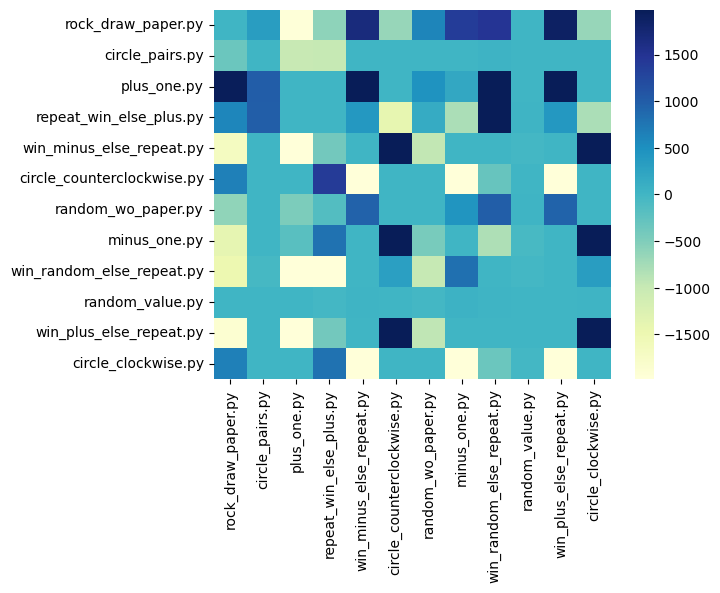

In [783]:
heatmap = sns.heatmap(data=matrix, cmap='YlGnBu', xticklabels=agents, yticklabels=agents)

Отсортируем стратегии по общей успешности:

In [778]:
sorted(list(zip([sum(line) for line in matrix], agents)), reverse=True)

[(9551.0, 'plus_one.py'),
 (3510.0, 'rock_draw_paper.py'),
 (2094.0, 'random_wo_paper.py'),
 (1879.0, 'minus_one.py'),
 (1538.0, 'repeat_win_else_plus.py'),
 (83.0, 'random_value.py'),
 (-1087.0, 'win_minus_else_repeat.py'),
 (-1241.0, 'win_plus_else_repeat.py'),
 (-2263.0, 'circle_pairs.py'),
 (-4193.0, 'circle_counterclockwise.py'),
 (-4846.0, 'circle_clockwise.py'),
 (-5025.0, 'win_random_else_repeat.py')]

Как видим, для данного набора агентов самым успешным оказался 'plus_one' - возвращать то, что побеждало прошлый выбор соперника.

Самой неуспешной оказалась стратегия win_random_else_repeat - после выигрыша выбирать случайное значение, иначе - повторять прошлое